## 1. Import libraries and the dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
# For models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# For evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('datasets/kc_house_data.csv')
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


## 2. Explore the dataset and data prerocessing

In [3]:
# Dataset shape and type
print('The shape of this dataframe is: {}'.format(df.shape), '\n')
print('The type of each column in the dataset: \n{}'.format(df.dtypes))

The shape of this dataframe is: (21613, 21) 

The type of each column in the dataset: 
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
# Number of houses having a certain number of bedrooms
df['bedrooms'].value_counts().sort_index()

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [5]:
# Convert the 'date' column to datetime format and extract the date component as a string in the desired format
df['YYYYMMDD'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S').dt.strftime('%Y%m%d')

# Convert the 'YYYYMMDD' column to a numerical format
df['YYYYMMDD'] = pd.to_numeric(df['YYYYMMDD'])
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YYYYMMDD
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013


In [6]:
# Define new columns for year, month, day
df['YYYY'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d').dt.year
df['MM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d').dt.month
df['MM'] = df['MM'].astype(str).str.zfill(2)
df['DD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d').dt.day

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YYYYMMDD,YYYY,MM,DD
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013,2014,10,13
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209,2014,12,9
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225,2015,02,25
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209,2014,12,9
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218,2015,02,18


In [7]:
# Fill the above defined columns with values extracted from 'YYYYMMDD'
str_year = []
for i in df['YYYY']:
    str_year.append(str(i))
df['YYYY'] = str_year

str_month = []
for i in df['MM']:
    str_month.append(str(i))
df['MM'] = str_month

df['YYYYMM'] = df['YYYY'] + df['MM']

for i in df['YYYYMM']:
    i = int(i)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YYYYMMDD,YYYY,MM,DD,YYYYMM
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013,2014,10,13,201410
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209,2014,12,9,201412
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225,2015,02,25,201502
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209,2014,12,9,201412
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218,2015,02,18,201502


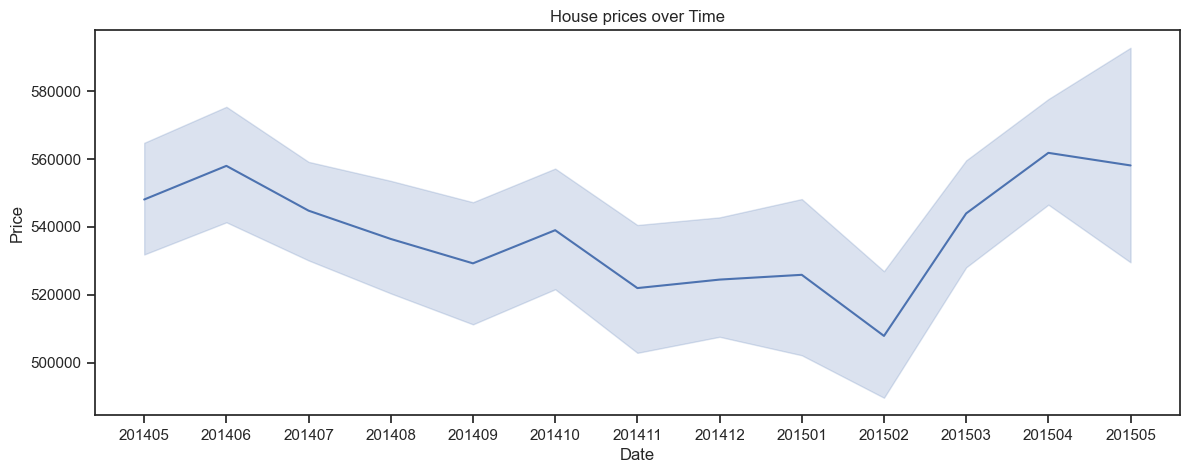

In [8]:
# Plot year_month against price
sns.set_theme(style="ticks")

# Set the size of the figure
plt.figure(figsize=(14, 5))

# Sort the dataframe by the 'year_month' column
df1 = df.sort_values('YYYYMM')

# Create a line plot using seaborn
sns.lineplot(data=df1, x='YYYYMM', y='price')

# Customize the plot using matplotlib.pyplot functions
plt.title('House prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [9]:
# Check if there are any id duplicates in the dataset
df_unique = df['id'].nunique()
print(len(df) != df_unique)
print('Number of duplicated house ids: {}'.format(len(df)-df_unique))

True
Number of duplicated house ids: 177


In [10]:
# Find all rows where the 'id' column is duplicated
duplicates = df[df['id'].duplicated(keep=False)]

# Print the duplicates
#duplicates.head(10)

# Define the columns that are allowed to have different values
allowed_columns = ['price', 'date', 'YYYYMMDD', 'YYYYMM', 'YYYY', 'MM', 'DD']

# Compare the cells between the original and duplicate rows for each duplicated id
changes = {}
for id in duplicates['id'].unique():
    group = duplicates[duplicates['id'] == id]
    original = df[df['id'] == id].iloc[0]
    for _, row in group.iterrows():
        if not original.equals(row):
            diff = original.compare(row)
            columns = diff[diff.notna()].index.tolist()
            # Only include columns that are not in the allowed_columns list
            columns = [col for col in columns if col not in allowed_columns]
            if columns:
                changes[id] = columns

# Check if there are any different values in the duplicated id rows other than the allowed columns
if not changes:
    print("There are no different values other than 'price', 'date', 'YYYYMMDD', 'YYYYMM', 'YYYY', 'MM', 'DD' in the duplicated 'id' rows!")
else:
    # Print the columns where the cells are different for each duplicated id
    for id, columns in changes.items():
        print(f"Duplicated id: {id}")
        for col in columns:
            print(f"Column '{col}': {df.loc[df['id'] == id, col].unique().tolist()}")

There are no different values other than 'price', 'date', 'YYYYMMDD', 'YYYYMM', 'YYYY', 'MM', 'DD' in the duplicated 'id' rows!


In [11]:
# Find the duplicates in the id column
duplicates = df[df.duplicated(['id'], keep=False)]
duplicates

# Drop the duplicates
df_unique = df.drop_duplicates()
if len(df) == len(df_unique):
    print('There are no duplicated rows in the dataset! :)')
else:
    print('The dataset CONTAINS some duplicates!')


There are no duplicated rows in the dataset! :)


In [12]:
# Drop rows containing missing values
df2 = df.dropna()
if len(df) == len(df2):
    print('There are no missing values in this dataframe! :)')
else:
    print('There are SOME MISSING VALUES in this dataframe!')

There are no missing values in this dataframe! :)


In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'YYYYMMDD', 'YYYY', 'MM',
       'DD', 'YYYYMM'],
      dtype='object')

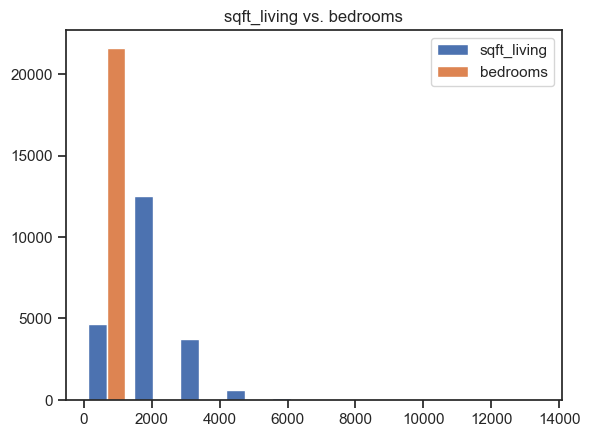

In [14]:
# Plot histograms
def plot_columns_hist(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    plt.hist([x, y], label=[x_col, y_col])
    plt.legend(loc='upper right')
    plt.title(x_col + ' vs. ' + y_col)
    plt.show()

plot_columns_hist(df, 'sqft_living', 'bedrooms')

C:\Users\User\AppData\Local\Temp\ipykernel_12260\836541824.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
YYYYMMDD         0.003033
DD              -0.014670
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


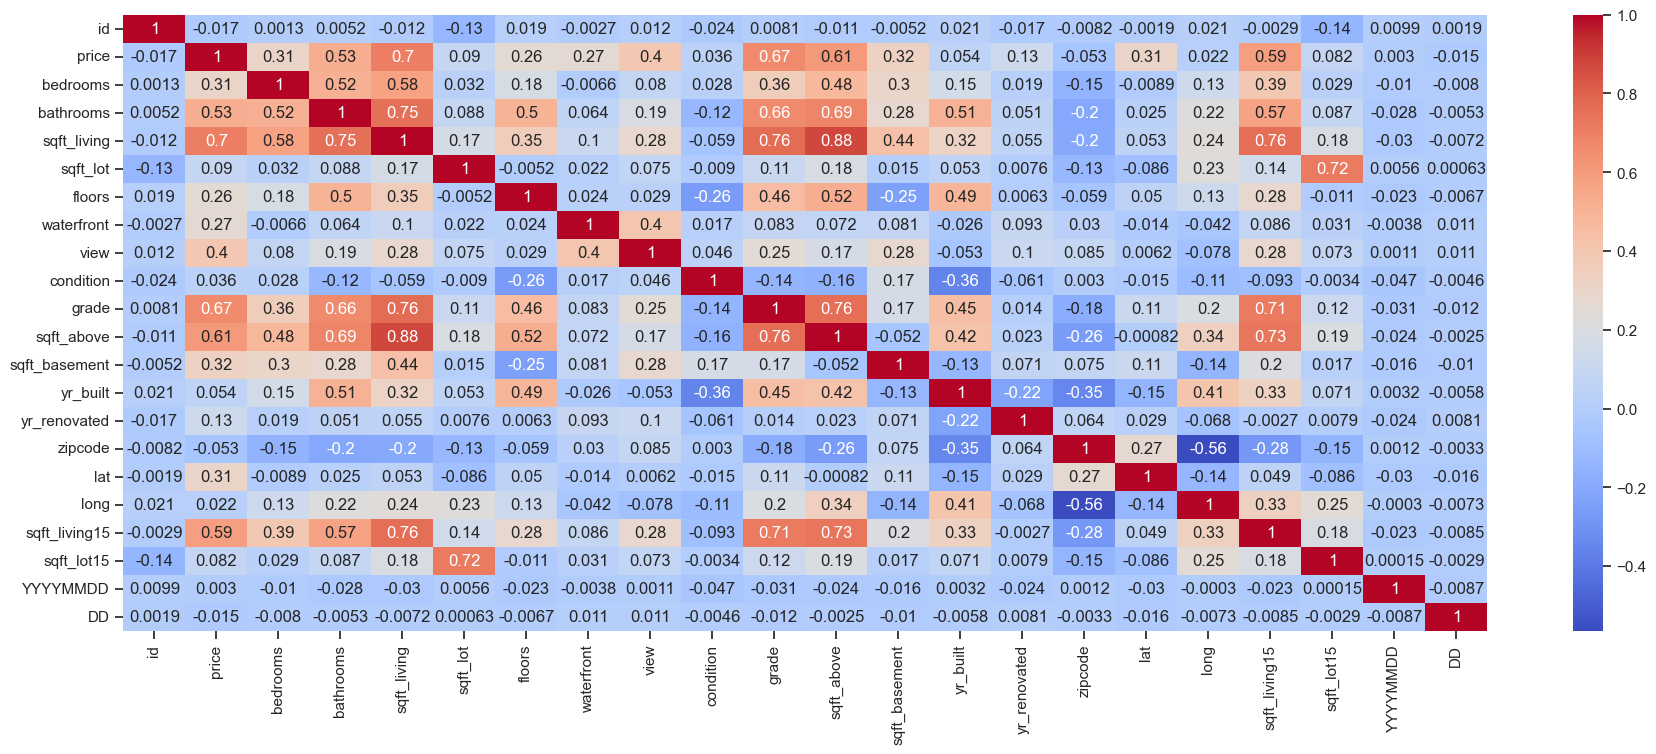

In [15]:
# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(22,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Sort the correlation matrix in descending order based on the absolute values of the correlation coefficients for the "price" column
corr_with_price = corr_matrix['price'].sort_values(ascending=False)

# Print out the features with the most impact on the "price" column
print(corr_with_price)

In [16]:
# Select the features with correlation greater than a threshold
threshold = 0.5
corr_features_price = set()
for i in range(len(corr_with_price.index)):
    for j in range(i):
        if abs(corr_with_price.iloc[i]) > threshold:
            colname = corr_with_price.index[i]
            corr_features_price.add(colname)

# Create a new dataset with the selected features
selected_features = list(corr_features_price)

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: ['sqft_living15', 'bathrooms', 'grade', 'sqft_living', 'sqft_above']


In [17]:
final_df = df.loc[:, ['sqft_living15', 'bathrooms', 'sqft_above', 'grade', 'sqft_living', 'price']]
final_df.head()

,sqft_living15,bathrooms,sqft_above,grade,sqft_living,price
0,1340,1.00,1180,7,1180,221900.0
1,1690,2.25,2170,7,2570,538000.0
2,2720,1.00,770,6,770,180000.0
3,1360,3.00,1050,7,1960,604000.0
4,1800,2.00,1680,8,1680,510000.0


In [18]:
# Split the dataset into features and target variable
X = final_df.drop('price', axis=1)
y = final_df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Define the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Try different values of k for cross-validation
best_k = 0
best_score = 0
for k in range(2, 10):
    scores = cross_val_score(model, X_train, y_train, cv=k)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_k = k
        best_score = mean_score

print("Best k:", best_k)
print("Best cross-validation score:", best_score)

# Evaluate the model using k-fold cross-validation
scores = cross_val_score(model, X, y, cv=best_k)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Best k: 11
Best cross-validation score: 0.5430137172010995
Cross-validation scores: [0.51682107 0.53939604 0.51276425 0.55217146 0.526341   0.53207999
 0.56138292 0.54608335 0.56050977 0.53700621 0.56628315]
Mean cross-validation score: 0.5409853838547668


##### The biggest error that the linear regression model could commit would be to overfit the training data if the model is too complex or has too many features compared to the size of the training data. In such a case, the model may perform well on the training data but may generalize poorly to the test data, leading to poor performance on the cross-validation. Therefore, it is important to carefully tune the model's complexity and the number of features used in the model to avoid overfitting.

In [ ]:
# Define the Ridge Regression model
model = Ridge()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Try different values of k for cross-validation
best_k = 0
best_score = 0
for k in range(2, 10):
    scores = cross_val_score(model, X_train, y_train, cv=k)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_k = k
        best_score = mean_score

print("Best k:", best_k)
print("Best cross-validation score:", best_score)

# Evaluate the model using k-fold cross-validation
scores = cross_val_score(model, X, y, cv=best_k)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

In [ ]:
# Define the Kernel Ridge Regression model
model = KernelRidge()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Try different values of k for cross-validation
best_k = 0
best_score = 0
for k in range(2, 10):
    scores = cross_val_score(model, X_train, y_train, cv=k)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_k = k
        best_score = mean_score

print("Best k:", best_k)
print("Best cross-validation score:", best_score)

# Evaluate the model using k-fold cross-validation
scores = cross_val_score(model, X, y, cv=best_k)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

In [33]:
# Define the random forest regression model
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Try different values of k for cross-validation
best_k = 0
best_score = 0
for k in range(2, 10):
    scores = cross_val_score(model, X_train, y_train, cv=k)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_k = k
        best_score = mean_score

print("Best k:", best_k)
print("Best cross-validation score:", best_score)

# Evaluate the model using k-fold cross-validation
scores = cross_val_score(model, X, y, cv=best_k)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Best k: 4
Best cross-validation score: 0.6075495410161301
Cross-validation scores: [0.59096396 0.59199545 0.53918332 0.57852963]
Mean cross-validation score: 0.5751680882239356


In [38]:
# Hyperparameter tuning for Ridge Regression

# Define the Ridge regression model
model1 = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Use cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use cross-validation to find the best hyperparameters
model1_grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)
model1_grid.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters for Ridge Regression: ", model1_grid.best_params_)
print("Best score for Ridge Regression: ", model1_grid.best_score_)

Best hyperparameters for Ridge Regression:  {'alpha': 10.0}
Best score for Ridge Regression:  0.5420921869475539


In [39]:
# Hyperparameter tuning for Kernel Ridge Regression

# Define the model
kernel_ridge = KernelRidge(kernel='rbf')

# Define hyperparameters to tune
param_grid = {'alpha': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto']}

# Use cross-validation to find the best hyperparameters
kernel_ridge_grid = GridSearchCV(estimator=kernel_ridge, param_grid=param_grid, cv=5)
kernel_ridge_grid.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters for Kernel Ridge Regression: ", kernel_ridge_grid.best_params_)
print("Best score for Kernel Ridge Regression: ", kernel_ridge_grid.best_score_)

ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\kernel_ridge.py", line 193, in fit
    self._validate_params()
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'gamma' parameter of KernelRidge must be a float in the range [0, inf) or None. Got 'scale' instead.

--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\kernel_ridge.py", line 193, in fit
    self._validate_params()
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'gamma' parameter of KernelRidge must be a float in the range [0, inf) or None. Got 'auto' instead.


In [35]:
# Hyperparameter tuning for RandomForestRegressor

# Define the random forest regression model
model1 = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best mean cross-validation score: 0.6352940867672714


In [21]:
# Model evaluation

# Define models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1)
kernel_ridge_reg = KernelRidge(alpha=0.1, kernel='rbf')
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Define pipeline
models = {
    'Linear Regression': linear_reg,
    'Ridge Regression': ridge_reg,
    'Kernel Ridge Regression': kernel_ridge_reg,
    'Random Forest Regression': rf_reg
}

# Train and evaluate models
for name, model in models.items():
    print(f'Running {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'MSE: {mean_squared_error(y_test, y_pred)}\n')

Running Linear Regression
MSE: 68325878138.50517

Running Ridge Regression
MSE: 68326116039.57376

Running Kernel Ridge Regression
MSE: 417040995316.1951

Running Random Forest Regression
MSE: 69041596766.09792



##### Comparing the mean squares errors of the models, we'll see that the Kernel Ridge Regression model commits the least error among the others. A lower MSE indicates that the model is able to make more accurate predictions, while a higher MSE indicates that the model is not performing as well. Therefore the Kernel Rifge Regression model is the best performing model.

# Open tasks:
- Train different models: 
    - For example, you can consider the models introduced during the course: linear regression, ridge regression, kernel ridge regression, nyström approximation for kernel ridge regression. 
    - You should also consider at least one additional model, not introduced during the course, such as random forest, multi-layers perceptron, etc. For this additional model, you should explain what are its parameters and hyper-parameters. You should also explain how its hyper-parameters are related to the bias-variance tradeoff.
- For at least one of these models, you should try to understand in which situations the model commits the biggest errors. Can this information help you to build a better model?
- You should compare the different models (e.g., by k-fold cross-validation), choose the best one and evaluate it on a test dataset never used before.

In [ ]:
#define different models and train them
## one model from the course and one model not included in the course
## for the second model: parameters and hyper-parameters
## for the second model: explain how its hyper-parameters are related to the bias-variance tradeoff
## https://www.sciencedirect.com/science/article/pii/S0370157319300766